<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [85]:
import pandas as pd
import sys
sys.path.append('../code/')

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from preprocessing import *
from utils import *

In [3]:
batter2019 = pd.read_csv('../dataset/submission.csv', index_col=0)
regular = pd.read_csv('../dataset/Regular_Season_Batter.csv', index_col=0)
regular = regular[regular.batter_name.isin(batter2019.batter_name.unique())]
regular.year = regular.year.astype(int)
regular.shape

(1548, 28)

In [72]:
np.sort(regular.year.unique())

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [68]:
list(batter2019.columns)

['batter_name']

In [75]:
OPS_df = batter2019.copy()
colnames = list(OPS_df.columns)
for y in np.sort(regular.year.unique()):
    OPS_df = pd.merge(OPS_df, regular[regular.year==y][['batter_name','OPS']], on='batter_name', how='left')
    colnames.append('OPS_'+str(y))
    OPS_df.columns = colnames
OPS_df.columns

Index(['batter_name', 'OPS_1999', 'OPS_2000', 'OPS_2001', 'OPS_2002',
       'OPS_2003', 'OPS_2004', 'OPS_2005', 'OPS_2006', 'OPS_2007', 'OPS_2008',
       'OPS_2009', 'OPS_2010', 'OPS_2011', 'OPS_2012', 'OPS_2013', 'OPS_2014',
       'OPS_2015', 'OPS_2016', 'OPS_2017', 'OPS_2018'],
      dtype='object')

In [89]:
OPS_df1 = OPS_df.iloc[:110,:]
OPS_df2 = OPS_df.iloc[110:,:]

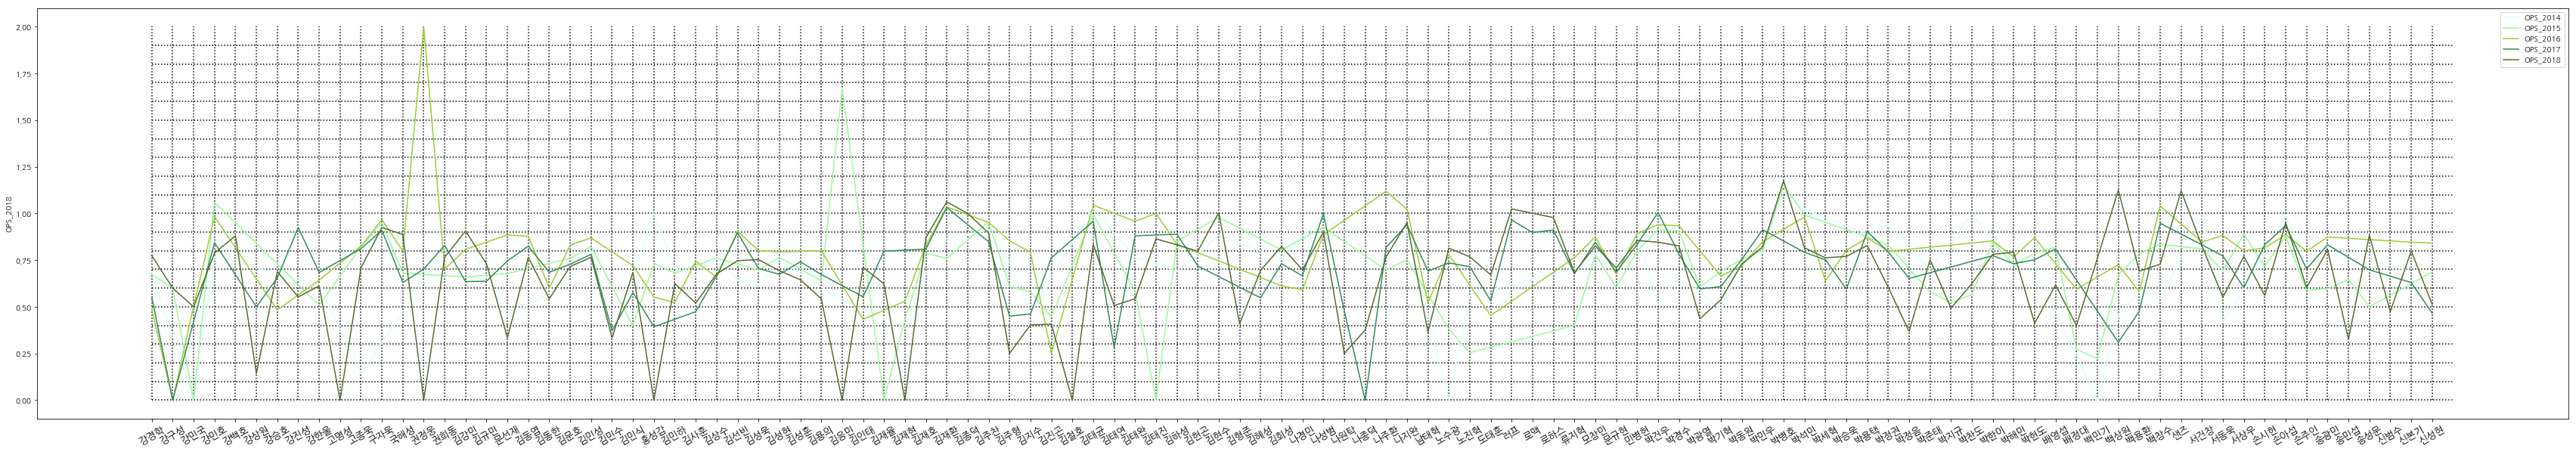

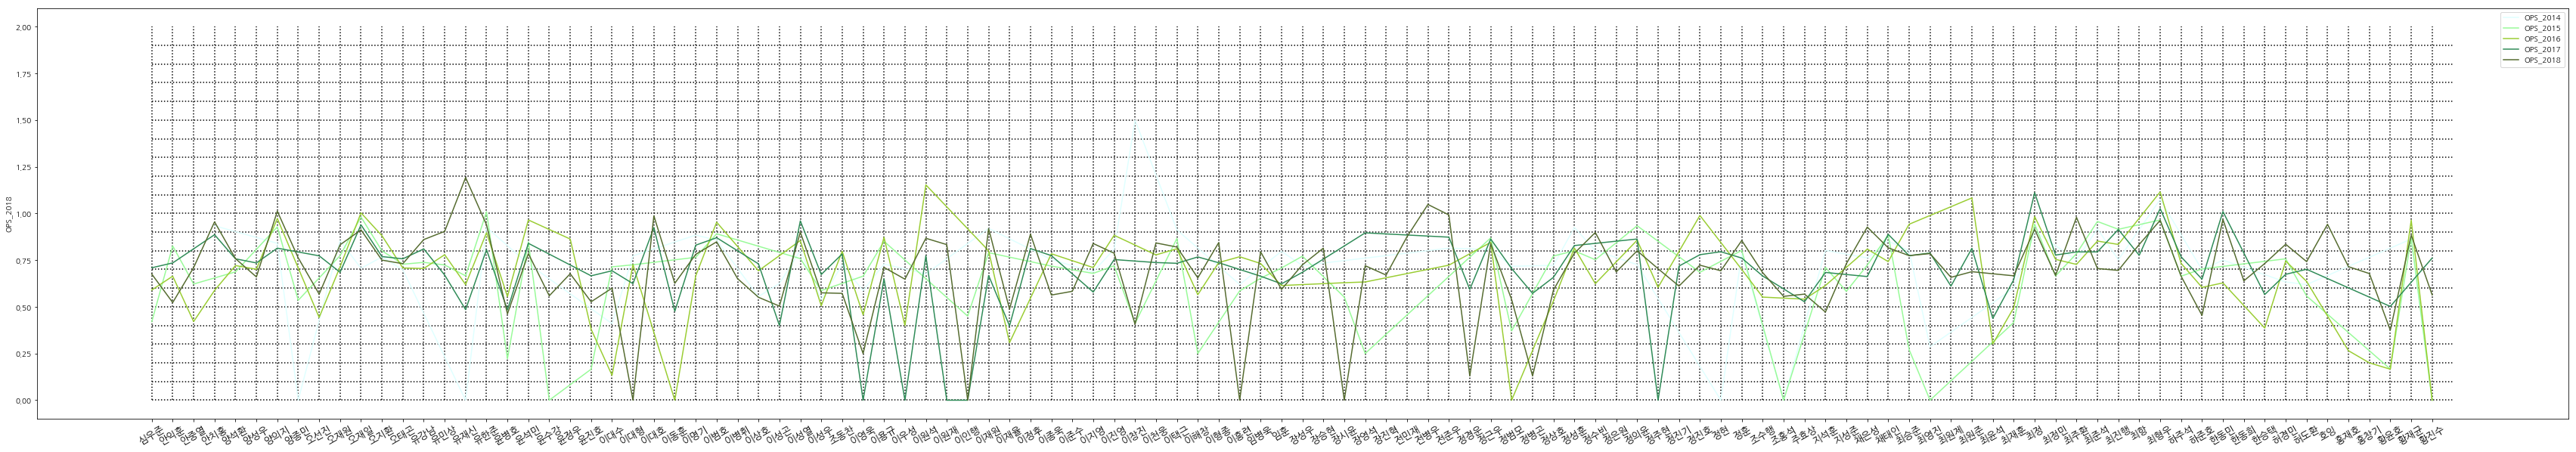

In [108]:
plt.figure(figsize=(60,10))
colors = ['lightcyan','palegreen','yellowgreen','seagreen','darkolivegreen']
for i in range(len(np.sort(regular.year.unique())[-5:])):
    sns.lineplot(x=np.arange(OPS_df1.shape[0]), y=OPS_df1['OPS_{}'.format(np.sort(regular.year.unique())[-5:][i])], label='OPS_{}'.format(np.sort(regular.year.unique())[-5:][i]), color=colors[i])
plt.xticks(np.arange(OPS_df1.shape[0]), OPS_df1.batter_name, size=13, rotation=30)
plt.vlines(x=np.arange(OPS_df1.shape[0]), ymin=0, ymax=2, linestyles='dotted')
plt.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=OPS_df1.shape[0], linestyles='dotted')
plt.show()


plt.figure(figsize=(60,10))
for i in range(len(np.sort(regular.year.unique())[-5:])):
    sns.lineplot(x=np.arange(OPS_df2.shape[0]), y=OPS_df2['OPS_{}'.format(np.sort(regular.year.unique())[-5:][i])], label='OPS_{}'.format(np.sort(regular.year.unique())[-5:][i]), color=colors[i])
plt.xticks(np.arange(OPS_df2.shape[0]), OPS_df2.batter_name, size=13, rotation=30)
plt.vlines(x=np.arange(OPS_df2.shape[0]), ymin=0, ymax=2, linestyles='dotted')
plt.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=OPS_df2.shape[0], linestyles='dotted')
plt.show()

In [35]:
temp20190411_1 = pd.read_csv('../dataset/basic_record_201904111.csv')
temp20190411_2 = pd.read_csv('../dataset/basic_record_201904112.csv')
print('temp20190411_1.shape: ',temp20190411_1.shape)
print('temp20190411_2.shape: ',temp20190411_2.shape)

temp20190411_1.shape:  (188, 17)
temp20190411_2.shape:  (188, 16)


In [36]:
temp20190411 = pd.merge(temp20190411_1, temp20190411_2, on='선수명', how='inner')
temp20190411 = temp20190411[['선수명','AB','OPS']]
temp20190411.columns = ['batter_name','AB0411','OPS0411']
print('temp20190411.shape: ',temp20190411.shape)

temp20190411.shape:  (188, 3)


In [48]:
regular = pd.read_csv('../dataset/after_preprocessing.csv')

In [49]:
batter2019 = regular[regular.year==2019][['batter_name','year']]
batter2019.head()

,batter_name,year
2454,강경학,2019
2455,강구성,2019
2456,강민국,2019
2457,강민호,2019
2458,강백호,2019


In [50]:
batter2019_df = pd.merge(batter2019, temp20190411, on='batter_name', how='left')
batter2019_df = batter2019_df.fillna(0)
batter2019_df.OPS0411 = batter2019_df.OPS0411.replace('-','0')
batter2019_df.OPS0411 = batter2019_df.OPS0411.astype(float)

In [51]:
batter2019_df.columns

Index(['batter_name', 'year', 'AB0411', 'OPS0411'], dtype='object')

In [40]:
df = regular[['batter_name','year','total_AB','corrected_OPS','OPS']]
df = df[(df.batter_name.isin(batter2019_df.batter_name.unique())) & (df.year >= 2017)]
df2017 = df[df.year==2017]
df2018 = df[df.year==2018]
df2019 = df[df.year==2019]

df2017.columns = ['batter_name','year','total_AB_2017','c_OPS_2018','OPS_2017']
df2018.columns = ['batter_name','year','total_AB_2018','c_OPS_2019','OPS_2018']
df2019.columns = ['batter_name','year','total_AB_2019','c_OPS_2020','OPS_2019']
df2017 = df2017.drop('year',axis=1)
df2018 = df2018.drop('year',axis=1)
df2019 = df2019.drop('year',axis=1)
df1718 = pd.merge(df2018, df2017, on='batter_name', how='left')
df = pd.merge(df1718, df2019, on='batter_name', how='left')

In [54]:
df.columns

Index(['batter_name', 'total_AB_2018', 'c_OPS_2019', 'OPS_2018',
       'total_AB_2017', 'c_OPS_2018', 'OPS_2017', 'total_AB_2019',
       'c_OPS_2020', 'OPS_2019'],
      dtype='object')

In [44]:
batter2019_df.columns

Index(['batter_name', 'year', 'AB0411', 'OPS0411'], dtype='object')

In [45]:
batter20190411_df.columns

Index(['batter_name', 'year', 'AB0411', 'OPS0411'], dtype='object')

In [55]:
predictions = pd.concat([df, batter20190411_df.OPS0411], axis=1)

cum_season = regular[regular.year<2019].batter_name.value_counts().reset_index()
cum_season.columns = ['batter_name','cum_season_2018']
predictions = pd.merge(predictions, cum_season, on='batter_name', how='left')
predictions.loc[:,'AB_rate_2019'] = predictions.total_AB_2019 / predictions.cum_season_2018

predictions = pd.concat([predictions,batter20190411_df.AB0411], axis=1)

season_out = ['강상원','이용규','박헌도','이대수','정성훈','이영욱','백상원','최원제','임훈','박기혁','이진영','최준석','이종욱','김태완','윤병호','조동찬','정경운']
second = ['강한울','권정웅','김민성','김사훈','김응민','김인태','김재현','김재율','김종덕','김주형','김지수','김진곤','김철호','김형준','김회성','남태혁','박공원','박지규','백민기','서동욱','신범수','신성현','양석환','유민상','윤정우','이동훈','이범호','이병휘','이성곤','이우성','이인행','이재율','이준수','이흥련','전민재','조수행','최정민','황진수','홍창기']
predictions.loc[predictions.batter_name.isin(season_out),'season_out'] = 1
predictions.season_out = predictions.season_out.fillna(0)
predictions.loc[predictions.batter_name.isin(second),'second'] = 1
predictions.second = predictions.second.fillna(0)

In [57]:
probs = pd.read_csv('../submission/submit7(model4_and_pred8_kfold).csv')

In [61]:
e = wrmse(predictions.OPS0411, probs.OPS, predictions.AB0411)
print(e)

0.22445536185093798


In [74]:
predictions.shape

(220, 16)

In [72]:
pred.shape

(44, 16)

In [79]:
predictions = pd.merge(predictions, probs, on='batter_name', how='inner')

In [80]:
predictions1 = predictions.iloc[:44,:]
predictions2 = predictions.iloc[44:88, :]
predictions3 = predictions.iloc[88:132, :]
predictions4 = predictions.iloc[132:176,:]
predictions5 = predictions.iloc[176:,:]
predictions_list = [predictions1, predictions2, predictions3, predictions4, predictions5]

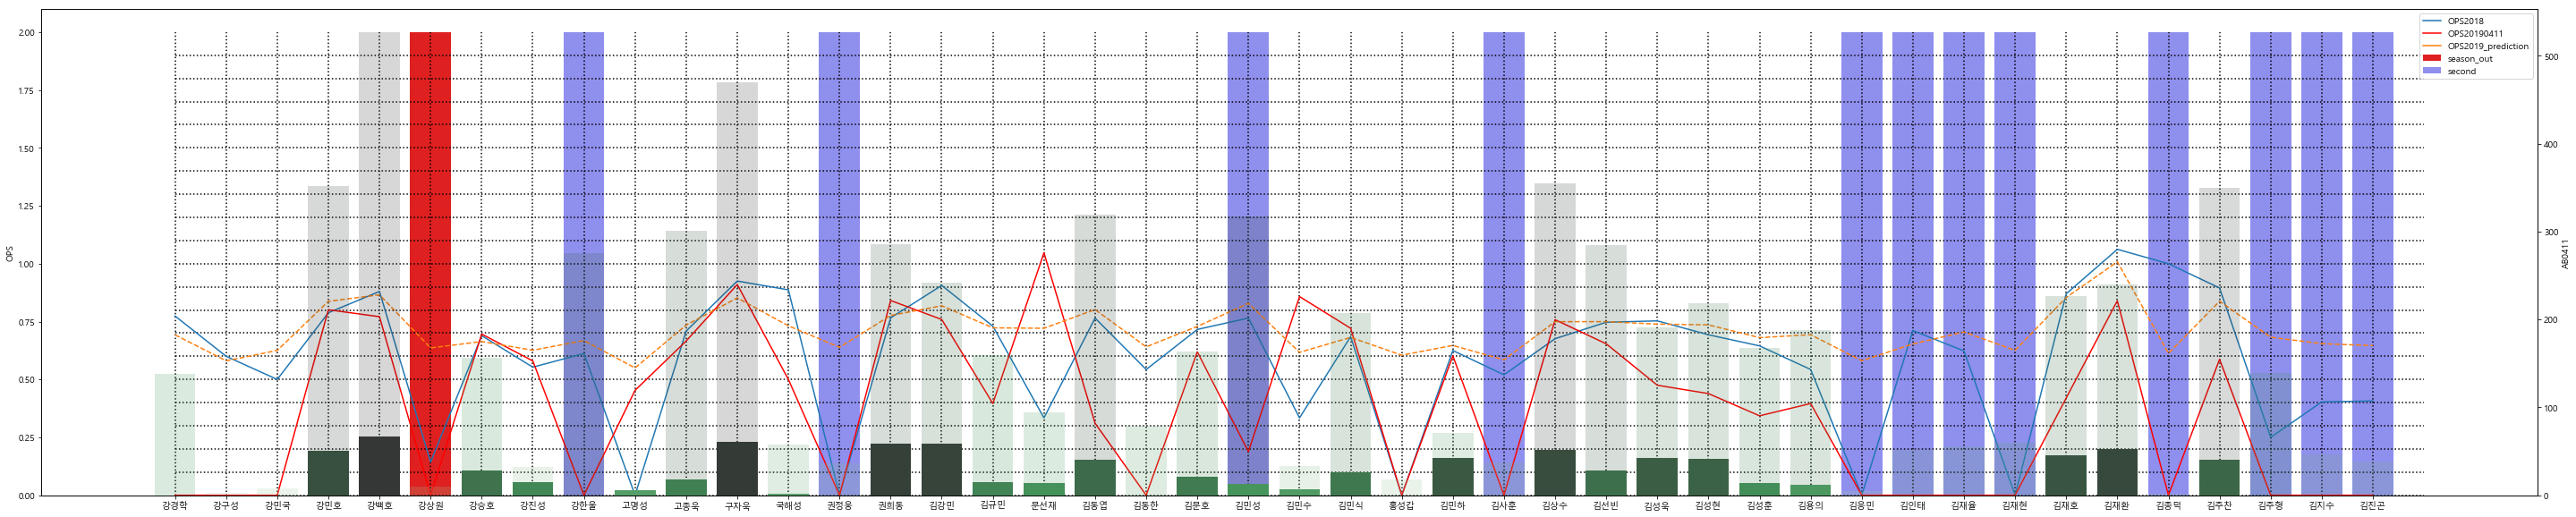

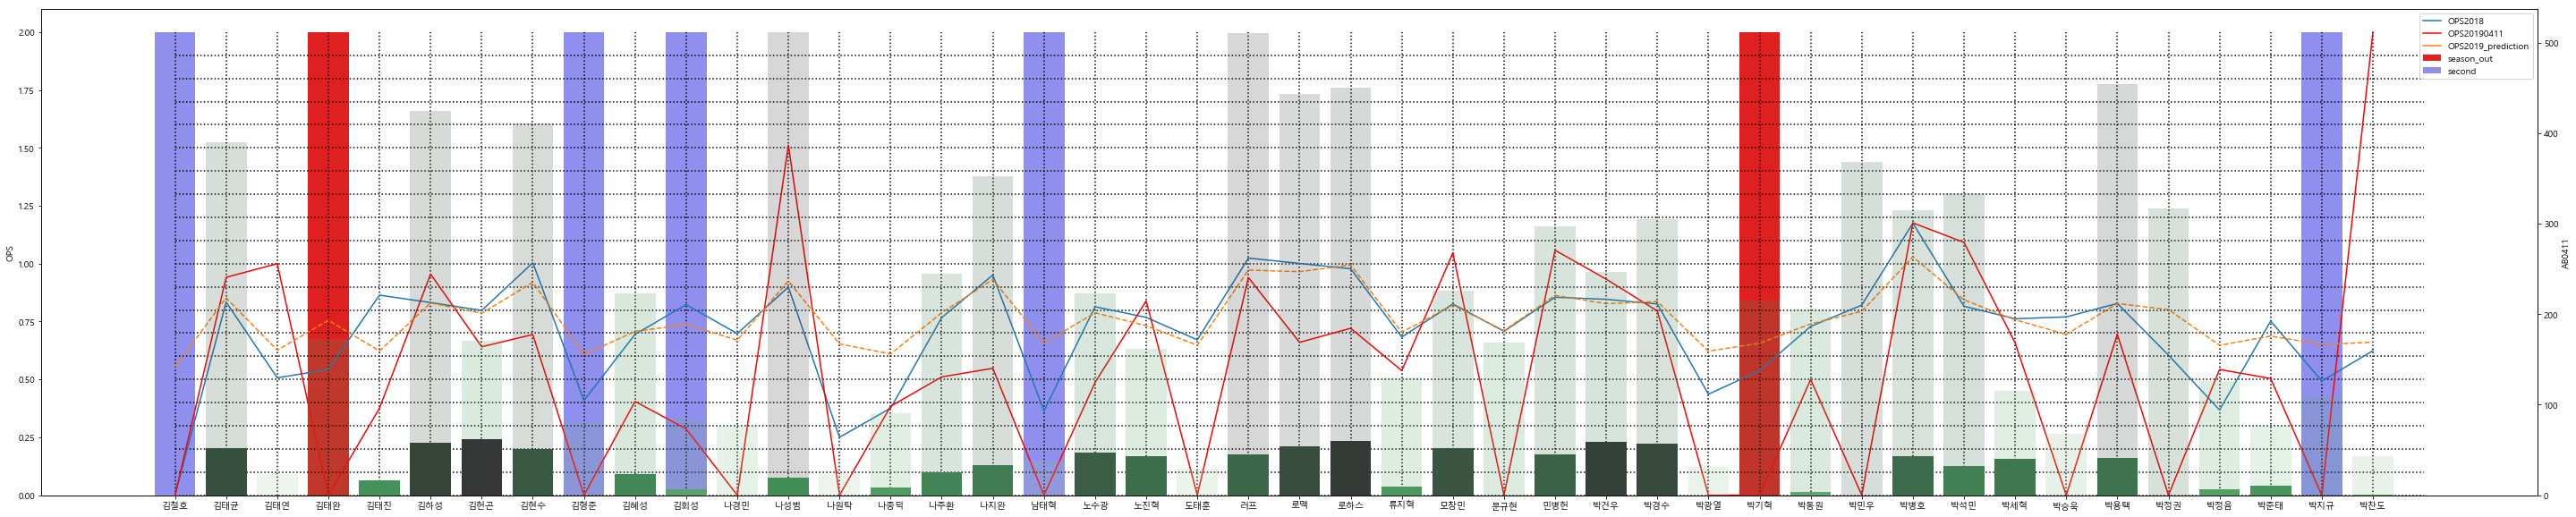

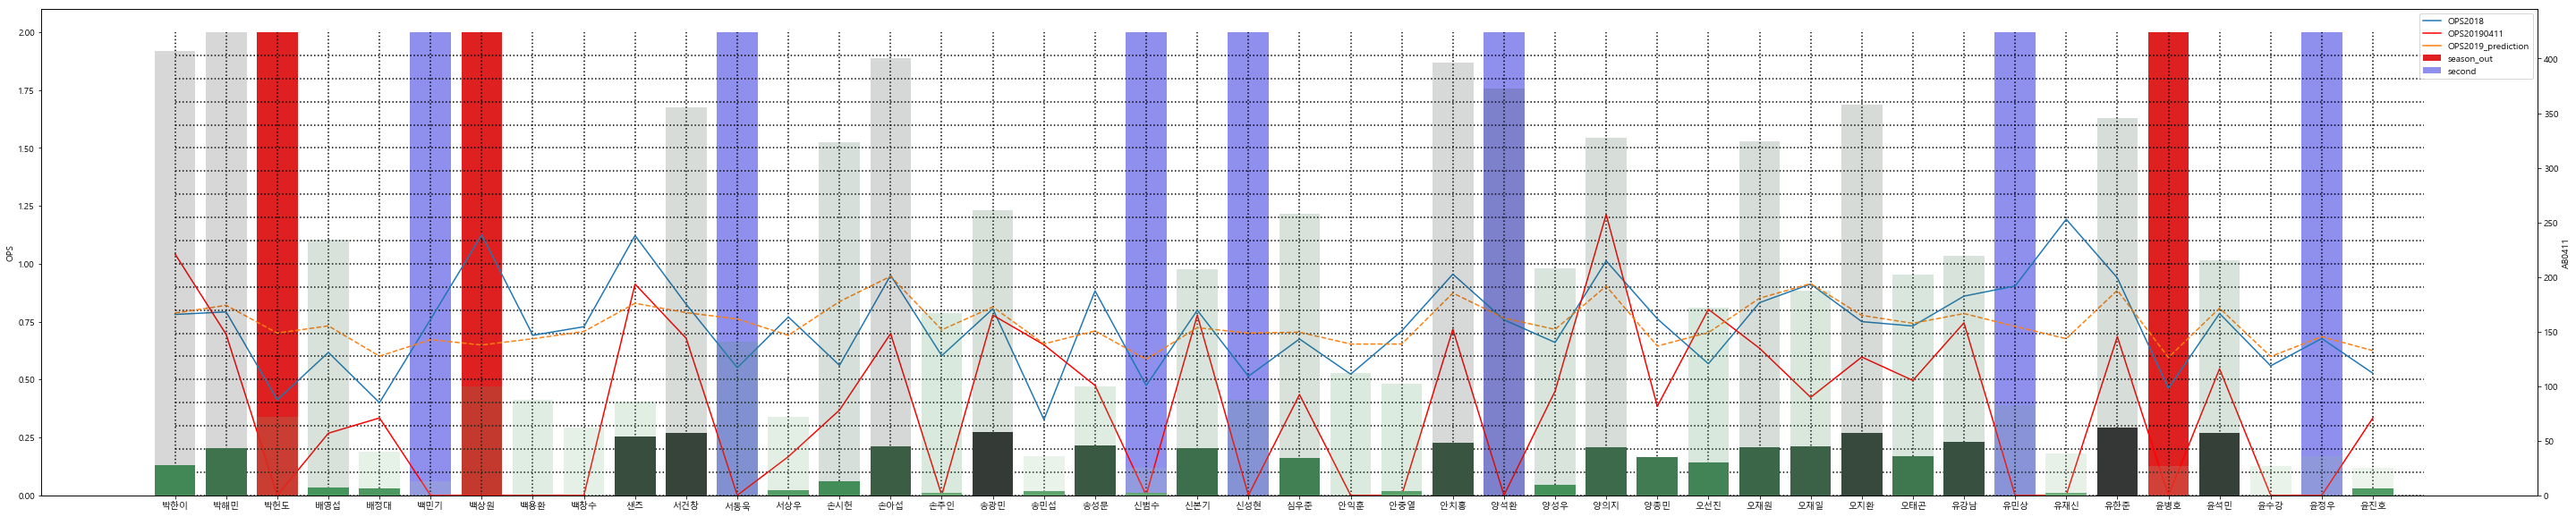

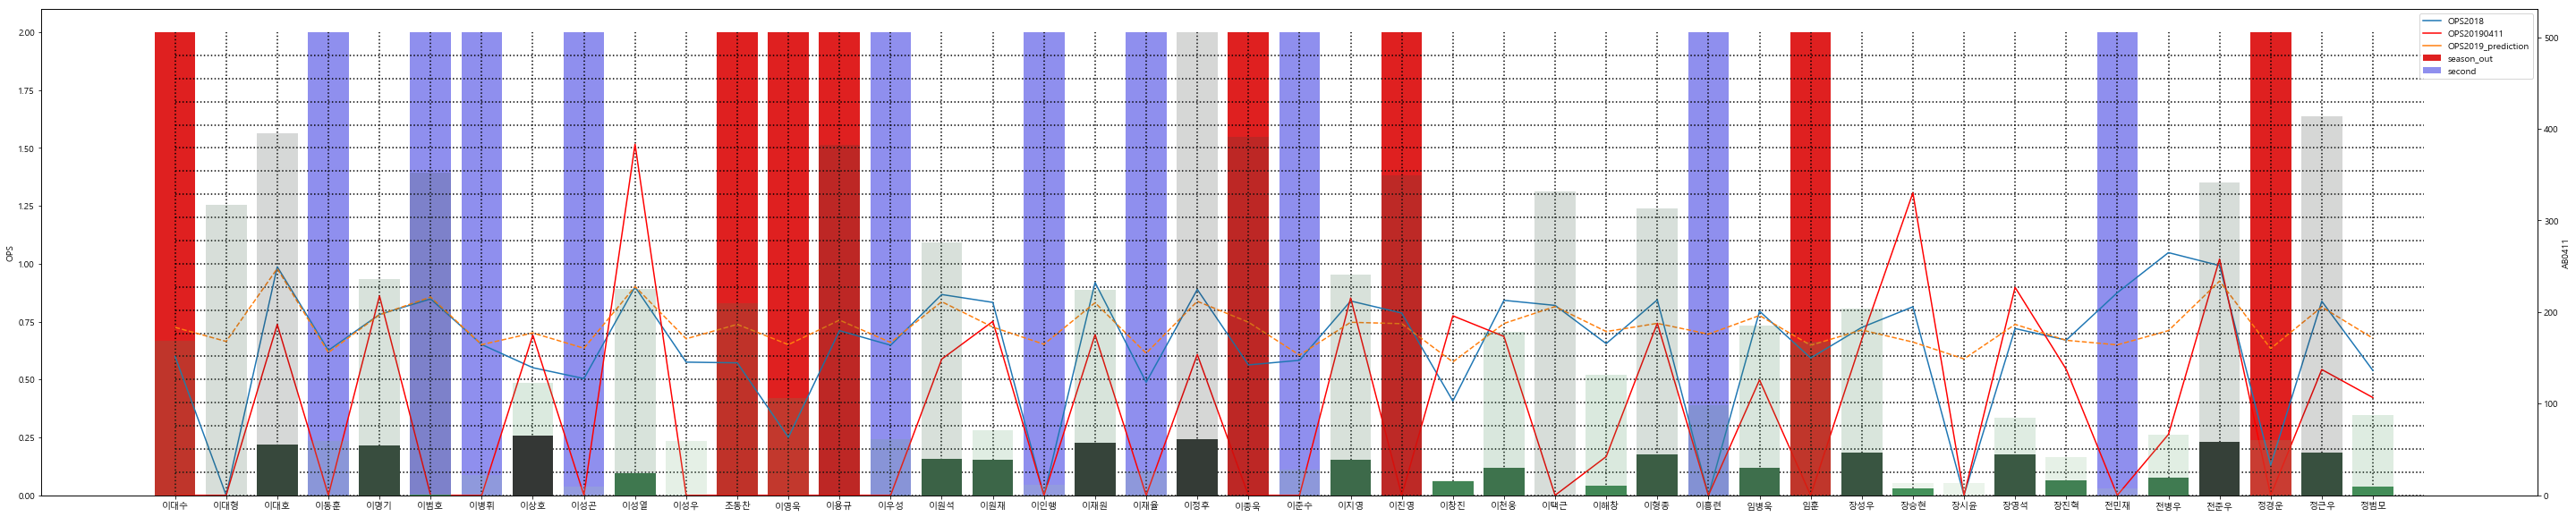

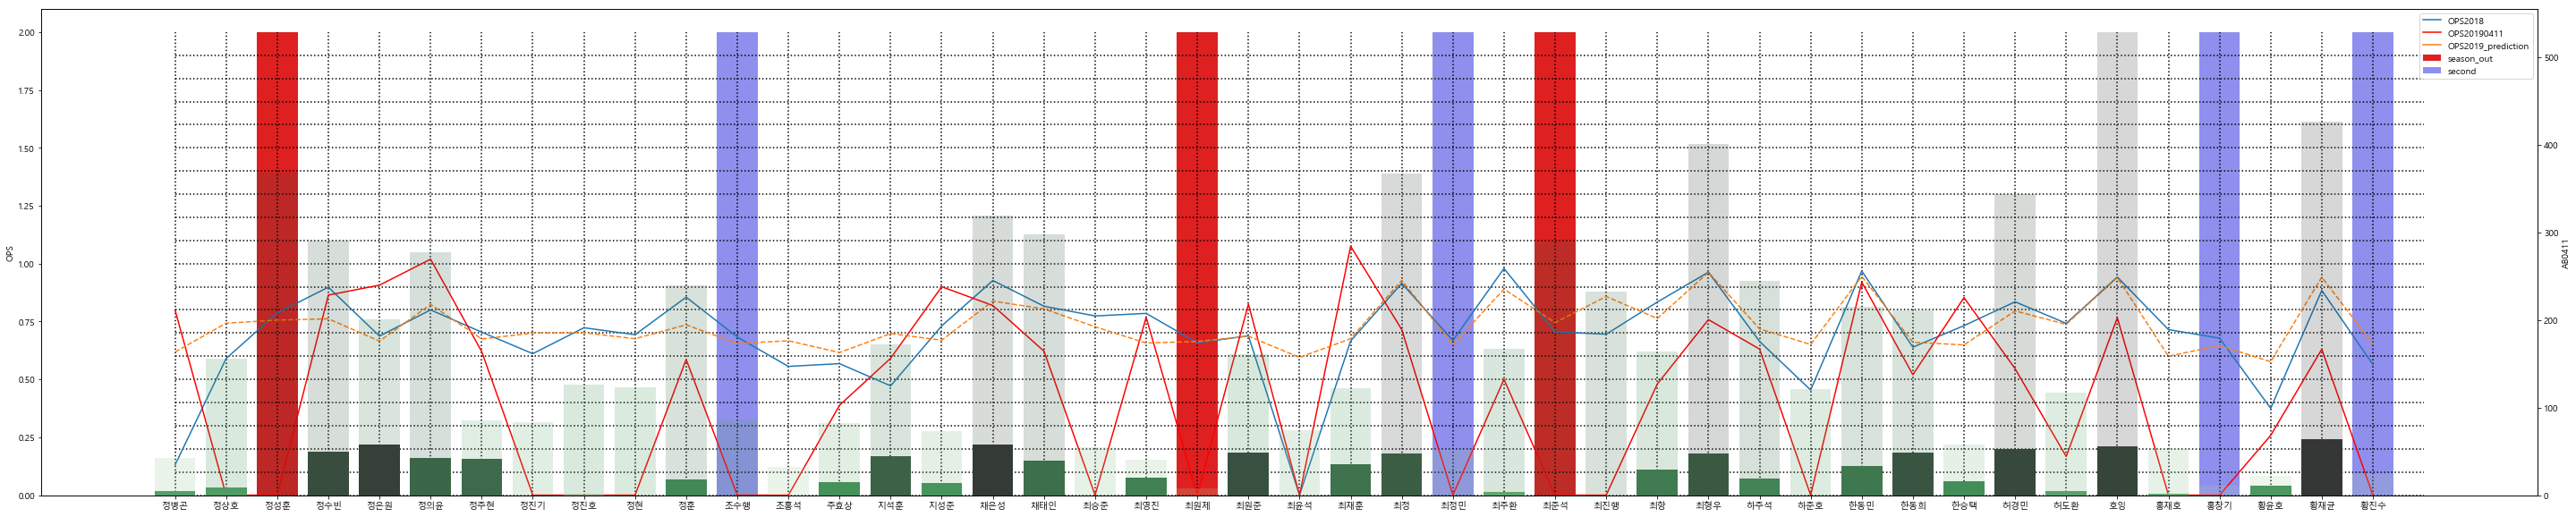

In [87]:
for pred in predictions_list:
    plt.figure(figsize=(50,10))
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS_2018, label='OPS2018')
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS0411, label='OPS20190411', color='red')
    ax = sns.barplot(x=np.arange(pred.shape[0]), y=pred.season_out*2, label='season_out', color='red')
    ax = sns.barplot(x=np.arange(pred.shape[0]), y=pred.second*2, label='second', color='blue', alpha=0.5)
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS, label='OPS2019_prediction')
    ax.lines[-1].set_linestyle("--")
    ax2 = ax.twinx()
    pal = sns.color_palette("Greens_d", pred.shape[0])
    rank = pred.AB_rate_2019.argsort().argsort()
    rank2 = pred.AB0411.argsort().argsort()
    sns.barplot(x=np.arange(pred.shape[0]), y=pred.AB_rate_2019, palette=np.array(pal[::-1])[rank], alpha=0.2, ax=ax2)
    sns.barplot(x=np.arange(pred.shape[0]), y=pred.AB0411, palette=np.array(pal[::-1])[rank2], ax=ax2)
    plt.xticks(np.arange(pred.shape[0]), pred.batter_name, size=15, rotation=10)
    ax.vlines(x=np.arange(pred.shape[0]), ymin=0, ymax=2, linestyles='dotted')
    ax.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=pred.shape[0], linestyles='dotted')
#     ax.set_ylim([0.25,1.25])
    plt.show()